In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def cont_func(x):
    return x[0]**3-x[0]-x[1]

In [3]:
def disc_func(x):
    F = np.zeros(2)
    F[0] = x[0]**2+x[1]**2-1
    F[1] = 8*x[0]**4-10*x[0]**2-x[1]+2
    return F

In [4]:
trials = 1000
xcont = np.zeros((trials,2))
xdisc = np.zeros((trials,2))
x0set = np.zeros((trials,2))

for trial in tqdm(np.arange(trials)):
    x0 = -1+2*np.random.rand(2)
    x0set[trial,:] = x0
    result_cont = opt.least_squares(cont_func,x0)
    result_disc = opt.least_squares(disc_func,x0)
    xcont[trial,:] = result_cont.x
    xdisc[trial,:] = result_disc.x

100%|██████████████████████████████████████| 1000/1000 [00:07<00:00, 138.79it/s]


In [40]:
print(np.unique(np.round(xcont,decimals=5),axis=0).shape[0])
print(np.unique(np.round(xdisc,decimals=5),axis=0).shape[0])

997
8


In [15]:
np.unique(np.round(xdisc,decimals=5),axis=0)

array([[-1.     ,  0.     ],
       [-0.98481, -0.17365],
       [-0.64279, -0.76604],
       [-0.34202,  0.93969],
       [ 0.34202,  0.93969],
       [ 0.64279, -0.76604],
       [ 0.98481, -0.17365],
       [ 1.     ,  0.     ]])

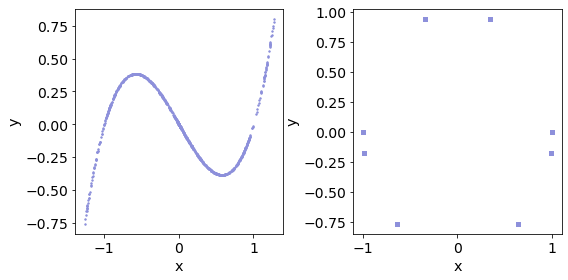

In [7]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
im = ax.scatter(xcont[:,0],xcont[:,1],s=2,c='#8d90db')
ax.tick_params(axis='both',labelsize=14)
ax2 = fig.add_subplot(122)
im2 = ax2.scatter(xdisc[:,0],xdisc[:,1],s=16,c='#8d90db')
ax2.set_xlabel('x',size='x-large')
ax.set_xlabel('x',size='x-large')
ax.set_ylabel('y',size='x-large')
ax2.set_ylabel('y',size='x-large')
ax2.tick_params(axis='both',labelsize=14)
fig.tight_layout()
plt.savefig('projection_experiments.png',bbox_inches='tight')